In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
A=np.array([[5, 3, 0, 1],
           [4, 0, 0, 1],
           [1, 1, 0, 5],
           [1, 0, 0, 4],
           [0, 1, 5, 4]])

n,m=A.shape
k=2

In [3]:
X=tf.placeholder(dtype=tf.float32,shape=[n,m])

In [4]:
P=tf.Variable(tf.truncated_normal([n,k]))
Q=tf.Variable(tf.truncated_normal([m,k]))

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
b=tf.Variable(tf.zeros([1]))
p=tf.Variable(tf.zeros([n,1]))
q=tf.Variable(tf.zeros([m,1]))

In [6]:
init=tf.global_variables_initializer()

In [7]:
X_= b + tf.matmul(P+p, tf.transpose(Q+q))
indices=tf.where(tf.not_equal(X,0))
loss=tf.reduce_mean((tf.gather_nd(X,indices)-tf.gather_nd(X_,indices))**2)

In [13]:
train_step=tf.train.GradientDescentOptimizer(0.005).minimize(loss)

[[4.722825   3.2517657  5.4975758  0.8743243 ]
 [3.7506661  3.9985828  0.30460668 0.8552625 ]
 [0.6056266  1.2762285  2.519865   4.783703  ]
 [0.9812467  2.009636   0.74445236 3.997486  ]
 [1.6446605  1.2962424  5.042218   4.1687164 ]] {<tf.Tensor 'Placeholder:0' shape=(5, 4) dtype=float32>: array([[5, 3, 0, 1],
       [4, 0, 0, 1],
       [1, 1, 0, 5],
       [1, 0, 0, 4],
       [0, 1, 5, 4]])}


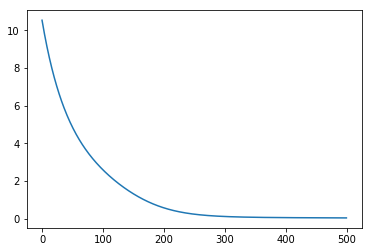

In [15]:
sess=tf.Session()
sess.run(init)
scores=[]
for _ in range(500):
    sess.run(train_step, {X:A})
    scores.append(sess.run(loss, {X:A}))
print(sess.run(tf.matmul(P+p,tf.transpose(Q+q))+b), {X:A})
sess.close()
plt.plot(scores)

In [17]:
A

array([[5, 3, 0, 1],
       [4, 0, 0, 1],
       [1, 1, 0, 5],
       [1, 0, 0, 4],
       [0, 1, 5, 4]])

In [16]:
scores[-1]

0.04893114